<a href="https://colab.research.google.com/github/FrankGangWang/AppliedML_Python_Coursera/blob/master/Exeter_Test_2024_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature extraction methods:
1. spatial autocorrelation of alist of lags per sample;
2. histogram per sample;

There are 3 general approaches to encoding sequence data:

1.   Ordinal encoding DNA Sequence
2.   One-hot encoding DNA Sequence
3.   DNA sequence as a “language”, known as k-mer counting


Ref:

https://www.theaidream.com/post/demystify-dna-sequencing-with-machine-learning-and-python


#Ordinal encoding DNA sequence data

In this approach, we need to encode each nitrogen base as an ordinal value. For example “ATGC” becomes [0.25, 0.5, 0.75, 1.0]. Any other base such as “N” can be a 0.


So let us create functions such as creating a NumPy array object from a sequence string, and a label encoder with the DNA sequence alphabet “a”, “c”, “g” and “t”, but also a character for anything else, “n”.

In [ ]:
#Ordinal encoding DNA sequence data: 'NATGC'=[0.0, .25,.5, .75, 1.0]
# any chars not one of 'atcg' is forced to be 'z' and encoded to be 0.0;
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()

   #anything not 'atcg' will be forced to be 'n'
   seq_string = re.sub('[^acgt]', 'z', seq_string)

   seq_string = np.array(list(seq_string))
   return seq_string

# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

def ordinal_encoder(my_array):
   integer_encoded = label_encoder.transform(my_array)
   float_encoded = integer_encoded.astype(float)
   float_encoded[float_encoded == 0] = 0.25 # A
   float_encoded[float_encoded == 1] = 0.50 # C
   float_encoded[float_encoded == 2] = 0.75 # G
   float_encoded[float_encoded == 3] = 1.00 # T
   float_encoded[float_encoded == 4] = 0.00 # anything else, lets say z
   return float_encoded


In [ ]:
#https://raw.githubusercontent.com/nageshsinghc4/DNA-Sequence-Machine-learning/master/chimp_data.txt
a1='ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCATACTCCTGACACTATTTCTCGTCACCCAACTAAAAATATTAAATTCAAATTACCATCTACCCCCCTCACCAAAACCCATAAAAATAAAAAACTACAATAAACCCTGAGAACCAAAATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG	'
a2='ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAGGCTTACCCGCCGCAGTACTAATCATTCTATTCCCCCCTCTACTGGTCCCCACTTCTAAACATCTCATCAACAACCGACTAATTACCACCCAACAATGACTAATTCAACTGACCTCAAAACAAATAATAACTATACACAGCACTAAAGGACGAACCTGATCTCTCATACTAGTATCCTTAATCATTTTTATTACCACAACCAATCTTCTTGGGCTTCTACCCCACTCATTCACACCAACCACCCAACTATCTATAAACCTAGCCATGGCTATCCCCCTATGAGCAGGCGCAGTAGTCATAGGCTTTCGCTTTAAGACTAAAAATGCCCTAGCCCACTTCTTACCGCAAGGCACACCTACACCCCTTATCCCCATACTAGTTATCATCGAAACTATTAGCCTACTCATTCAACCAATAGCCTTAGCCGTACGTCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACACTAGCATTATCAACTATCAATCTACCCTATGCACTCATTATCTTCACAATTCTAATCCTACTGACTATTCTAGAGATCGCCGTCGCCTTAATCCAAGCCTACGTTTTTACACTTCTAGTGAGCCTCTACCTGCACGACAACACATAA	'
len(a1), len(a2)


In [ ]:
label_encoder.classes_, label_encoder.transform(['a','c','g','t','z'])

In [ ]:
#Let’s try out a simple short sequence:
seq_test = 'acgtnTTCAGCCAGTG'
print(string_to_array(seq_test), '\n', \
      label_encoder.transform(string_to_array(seq_test)), '\n', \
      label_encoder.transform(string_to_array(seq_test)).astype(float), \
      '\n', ordinal_encoder(string_to_array(seq_test)))

In [ ]:
string_to_array(seq_test)

#One-hot encoding DNA Sequence

Another approach is to use one-hot encoding to represent the DNA sequence. This is widely used in deep learning methods and lends itself well to algorithms like convolutional neural networks. In this example, “ATGC” would become [0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]. And these one-hot encoded vectors can either be concatenated or turned into 2-dimensional arrays.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

def one_hot_encoder(seq_string):
  seq_string = string_to_array(seq_string)
  int_encoded = label_encoder.transform(seq_string)
  print('my int_encoded', int_encoded)

  onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
  int_encoded = int_encoded.reshape(len(int_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(int_encoded)
  onehot_encoded = np.delete(onehot_encoded, -1, 1)
  return onehot_encoded

In [ ]:
#So let’s try it out with a simple short sequence:
one_hot_encoder('aaccggttbefg')

In [ ]:
int_encoded = label_encoder.transform(string_to_array('ACGTZnv'))
onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
print('int_encoded', int_encoded)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
onehot_encoder.fit(int_encoded)
print('onehot_encoder ', onehot_encoder.categories_)
onehot_encoder.transform(int_encoded)

#DNA sequence as a “language”, known as k-mer counting

A hurdle that still remains is that none of these above methods results in vectors of uniform length, and that is a necessity for feeding data to a classification or regression algorithm. So with the above methods, you have to resort to things like truncating sequences or padding with “n” or “0” to get vectors of uniform length.


DNA and protein sequences can be seen as the language of life. The language encodes instructions as well as functions for the molecules that are found in all life forms. The sequence language resemblance continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides are words, and nucleotide bases and amino acids are the alphabets. Since the relationship seems so likely, it stands to reason that natural language processing(NLP) should also implement the natural language of DNA and protein sequences.


The method we use here is manageable and easy. We first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use “words” of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.


In genomics, we refer to these types of manipulations as “k-mer counting”, or counting the occurrences of each possible k-mer sequence and Python natural language processing tools make it super easy.





In [ ]:
def Kmers_funct(seq, size):
   return [ seq[x:x+size].lower() for x in range(len(seq) - size + 1) ]

In [ ]:
#So let’s try it out with a simple sequence:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_wordsize = 6
print(len(mySeq)-Kmers_wordsize+1, len(Kmers_funct(mySeq, size=Kmers_wordsize)))
print(Kmers_funct(mySeq, size=Kmers_wordsize))

It returns a list of k-mer “words.” You can then join the “words” into a “sentence”, then apply your favorite natural language processing methods to the “sentences” as you normally would.





In [ ]:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
words = Kmers_funct(mySeq, size=Kmers_wordsize)
print(type(words), len(words), words)
joined_sentence = ' '.join(words)
print(type(joined_sentence), len(joined_sentence), joined_sentence)


<class 'list'> 25 ['gtgccc', 'tgccca', 'gcccag', 'cccagg', 'ccaggt', 'caggtt', 'aggttc', 'ggttca', 'gttcag', 'ttcagt', 'tcagtg', 'cagtga', 'agtgag', 'gtgagt', 'tgagtg', 'gagtga', 'agtgac', 'gtgaca', 'tgacac', 'gacaca', 'acacag', 'cacagg', 'acaggc', 'caggca', 'aggcag']
<class 'str'> 174 gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag


In [ ]:
25*Kmers_wordsize +  len(words)-1

174

You can tune both the **word length and the amount of overlap**. This allows you to determine how the DNA sequence information and vocabulary size will be important in your application. For example, if you use words of length 6, and there are 4 letters, you have a vocabulary of size pow(4,6)=4096 possible words. You can then go on and create a bag-of-words model like you would in NLP.




CountVectorizer() parameters:
# ngram_rangetuple (min_n, max_n), default=(1, 1)
# analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’


In [ ]:
#Let’s make a couple more “sentences” to make it more interesting.
Kmers_wordsize = 6
mySeq = 'CAGGTTCAGTGAGTGACACAGGCAcacag'
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCAATCACCC'
mySeq2 = 'CAGGTTCAGTGAGTGACACAGGCAcacaga'
joined_sentence = ' '.join(Kmers_funct(mySeq, size=Kmers_wordsize))
sentence1 = ' '.join(Kmers_funct(mySeq1, size=Kmers_wordsize))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=Kmers_wordsize))

#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # try: ngram_range=(4,4)
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()

In [ ]:
def sort_dict(vocabulary):
  return {k: v for k, v in sorted(vocabulary.items(), key=lambda item: item[1])}

print('fixed_vocabulary_=', cv.fixed_vocabulary_, type(cv.vocabulary_), len(cv.vocabulary_.keys()))
print('vocabulary_=', sort_dict(cv.vocabulary_))
print('X shape=', X.shape, '\nX[0] X[1] same num=', sum(X[0]==X[1]), '\nX[0] X[2] same num=', sum(X[0]==X[2]), \
      '\nX[2] X[1] diff num=', sum(X[1]==X[2]), '\n', X)

fixed_vocabulary_= False <class 'dict'> 49
vocabulary_= {'aatcac': 0, 'acacag': 1, 'acacat': 2, 'acaggc': 3, 'acatgt': 4, 'actgtc': 5, 'aggcac': 6, 'aggttc': 7, 'agtgac': 8, 'agtgag': 9, 'atcacc': 10, 'atcact': 11, 'atgtgc': 12, 'caatca': 13, 'cacaca': 14, 'cacaga': 15, 'cacagg': 16, 'cacatg': 17, 'cactgt': 18, 'caggca': 19, 'caggtt': 20, 'cagtga': 21, 'catgtg': 22, 'ccaatc': 23, 'ctcaca': 24, 'ctgtca': 25, 'gacaca': 26, 'gagtga': 27, 'gcacac': 28, 'gccaat': 29, 'ggcaca': 30, 'ggttca': 31, 'gtcaat': 32, 'gtgaca': 33, 'gtgagt': 34, 'gtgcca': 35, 'gttcag': 36, 'tcaatc': 37, 'tcacac': 38, 'tcaccc': 39, 'tcactg': 40, 'tcagtg': 41, 'tctcac': 42, 'tgacac': 43, 'tgagtg': 44, 'tgccaa': 45, 'tgtcaa': 46, 'tgtgcc': 47, 'ttcagt': 48}
X shape= (3, 49) 
X[0] X[1] same num= 2 
X[0] X[2] same num= 48 
X[2] X[1] diff num= 1 
 [[0 2 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0
  1 0 0 0 0 1 0 1 1 0 0 0 1]
 [2 0 1 0 1 1 0 0 0 0 1 1 1 2 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1
 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document of this document and I have it, and I lost the document.',
    'This document is the second document.',
    'And this is the third AND one.',
    'Is this the first document, is it?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
tmp = {k: v for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])}

print(X.shape, len(tmp), tmp, '\n', len(vectorizer.vocabulary_.items()), '\n', X.toarray())


(4, 13) 13 {'and': 0, 'document': 1, 'first': 2, 'have': 3, 'is': 4, 'it': 5, 'lost': 6, 'of': 7, 'one': 8, 'second': 9, 'the': 10, 'third': 11, 'this': 12} 
 13 
 [[2 3 1 1 1 1 1 1 0 0 2 0 2]
 [0 2 0 0 1 0 0 0 0 1 1 0 1]
 [2 0 0 0 1 0 0 0 1 0 1 1 1]
 [0 1 1 0 2 1 0 0 0 0 1 0 1]]


In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

In [ ]:
print(X.shape)
print(len(sentence1), len(mySeq1), len(sentence1.split()))
print(len(sentence2), len(mySeq2), len(sentence2.split()) )
print(len(joined_sentence), len(mySeq), len(joined_sentence.split()))



In [ ]:
print(X.shape, X)

In [ ]:
x=(np.unique([joined_sentence, sentence1, sentence2]))
type(x), x.shape, x.size, x.data



In [ ]:
print(len(np.unique(joined_sentence.split())),\
  len(np.unique(joined_sentence.split()+ sentence1.split())),\
  len(np.unique(joined_sentence.split()+ sentence2.split())),\
  len(np.unique(joined_sentence.split()+ sentence1.split()+ sentence2.split())))


In [ ]:
X

In [ ]:
print('joined_sentence=',joined_sentence, '\n', 'sentence1=\t', sentence1, '\n','sentence2=\t',sentence2)


In [ ]:
#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()


Usually, the term k-mer refers to all of a sequence's subsequences of length k, such that the sequence AGAT would have four monomers (A, G, A, and T), three 2-mers (AG, GA, AT), two 3-mers (AGA and GAT) and one 4-mer (AGAT). More generally, a sequence of length L will have L+K-1 k-mers and n^k total possible k-mers, where
n is number of possible monomers (e.g. four in the case of DNA).


Here comes machine learning…


Now that we have learned how to extract feature matrices from the DNA sequence, let us apply our newly acquired knowledge to a real-life machine learning use case.


Use case: Build a classification model that is trained on the human DNA sequence and can predict a gene family based on the DNA sequence of the coding sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

Gene families are groups of related genes that share a common ancestor. Members of gene families may be paralogs or orthologs. Gene paralogs are genes with similar sequences from within the same species while gene orthologs are genes with similar sequences in different species.


The dataset contains human DNA sequence, Dog DNA sequence, and Chimpanzee DNA sequence.


Load the human DNA sequence.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
human_dna = pd.read_table('./drive/My Drive/human_data.txt')
human_dna.head()

#outlier detection


In [9]:
def func_count_unique_chars(line, counter):
  """func to get unique chars in 'line' based on current 'counter'.
  Note: set counter = set() for the first line;
  """
  for c in line:
    counter.add(c)
  return (counter)
  #sorted(set) returns a list

In [18]:
# extract the unique chars in all samples
chars_list = set()
f = open("test.txt", "r")
count_chars = 0
for number_of_lines, line in enumerate(f):
  line = line.rstrip('\n')
  count_chars += len(line)
  chars_list = func_count_unique_chars(line, chars_list)
  if number_of_lines<5:
    print(f'Line {number_of_lines}:\t{len(line)} chars, total ={count_chars},\
            last 5 chars ={line[-5:]}, uniques={sorted(chars_list)}')

f.close()
number_of_lines = number_of_lines + 1
chars_list = sorted(chars_list)

Line 0:	105 chars, total =105,            last 5 chars =GDEGE, uniques=['C', 'D', 'E', 'F', 'G']
Line 1:	113 chars, total =218,            last 5 chars =GCEGE, uniques=['C', 'D', 'E', 'F', 'G']
Line 2:	113 chars, total =331,            last 5 chars =GCEGC, uniques=['C', 'D', 'E', 'F', 'G']
Line 3:	112 chars, total =443,            last 5 chars =ECGCE, uniques=['C', 'D', 'E', 'F', 'G']
Line 4:	115 chars, total =558,            last 5 chars =CEGEE, uniques=['C', 'D', 'E', 'F', 'G']


In [14]:
print('number of lines =\t', number_of_lines)
print('number of chars =\t', count_chars)
print('unique chars =', chars_list)

number of lines =	 300
number of chars =	 32363
unique chars = ['C', 'D', 'E', 'F', 'G']


In [20]:
import numpy as np
def func_count_chars_ordered(line, chars):
  """func to count number of strings in string 'line' based on current 'counter'.
  Note: set counter = {} for the first line;
  """
  counter = np.zeros((len(chars, )))
  #print(counter, line, chars)
  for id, c in enumerate(chars):
    #print(f'id={id}, ch={chars[id]}')
    counter[id] = line.count(chars[id])
  return counter


In [23]:
tmp = func_count_chars_ordered('ABC CCD DDD', chars_list)
tmp = [{chars_list[id]:tmp[id]} for id in range(len(chars_list))]
print(chars_list, tmp)

['C', 'D', 'E', 'F', 'G'] [{'C': 3.0}, {'D': 4.0}, {'E': 0.0}, {'F': 0.0}, {'G': 0.0}]


In [31]:
import numpy as np
import pandas as pd

df = np.zeros((number_of_lines, len(chars_list)))
print(chars_list, df.shape)

f = open("test.txt", "r")
for c, line in enumerate(f):
  if c<5:
    print(f'***num of chars in line {c} is {len(line), {line[-5:]}}')
  line = line.rstrip('\n')
  df[c] = func_count_chars_ordered(line, chars_list)
f.close()

df = pd.DataFrame(df, columns=chars_list)


['C', 'D', 'E', 'F', 'G'] (300, 5)
***num of chars in line 0 is (106, {'DEGE\n'})
***num of chars in line 1 is (114, {'CEGE\n'})
***num of chars in line 2 is (114, {'CEGC\n'})
***num of chars in line 3 is (113, {'CGCE\n'})
***num of chars in line 4 is (116, {'EGEE\n'})


In [25]:
df.head(3)

,C,D,E,F,G
0,17.0,10.0,32.0,15.0,31.0
1,18.0,10.0,37.0,15.0,33.0
2,17.0,10.0,38.0,15.0,33.0


In [ ]:
df.info()

In [ ]:
df.describe()

In [32]:
line

'GEGEEEDGCDGECFGEGGCEGCGEFCEFGDEEFGGDDGFGGGDGEEEFGEFECFFEGECDGFEFCCEGEGEEGEGFGCEDEEGECEECEFEDEGFGDEEGCFCGGGCEGECGCE'

<Axes: >

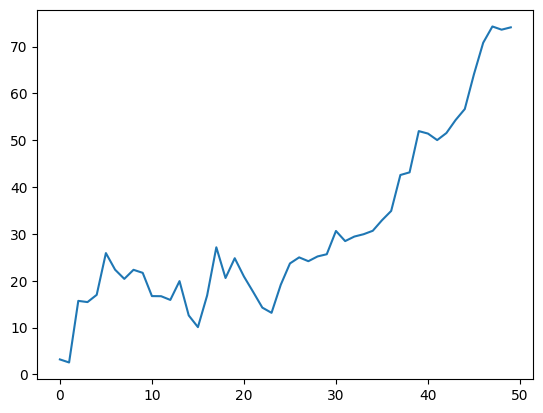

In [39]:
np.random.seed(5)
x = np.cumsum(np.random.normal(loc=1, scale=5, size=50))
s = pd.Series(x)
s.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

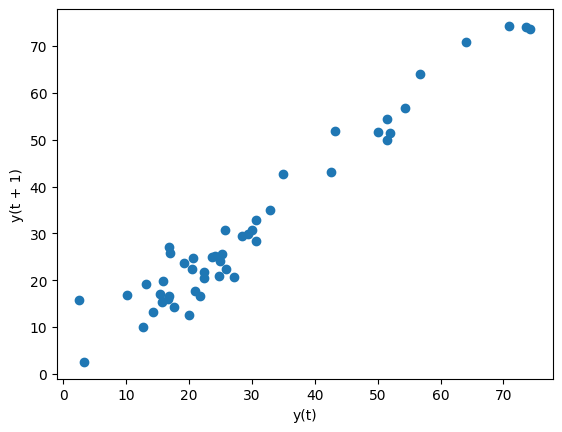

In [40]:
pd.plotting.lag_plot(s, lag=1)

In [ ]:
lag = 2
for col in df.columns:
  plt.figure()
  pd.plotting.lag_plot(df[col], lag=lag)
  plt.grid()


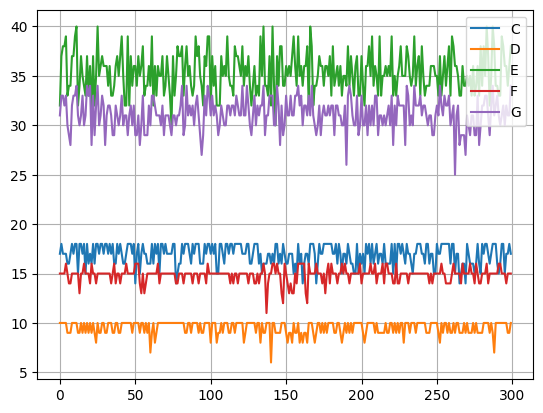

In [76]:
for col in df.columns:
  #plt.figure()
  plt.plot(df.loc[:, [col]])
plt.legend(df.columns, loc='upper right')
plt.grid()

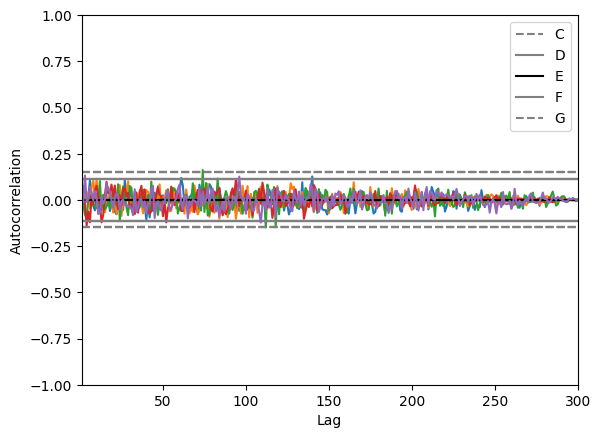

In [77]:
#pd.plotting.lag_plot(df.loc[:, ["C"]], lag=1)
import matplotlib.pyplot as plt
for col in df.columns:
  #plt.figure()
  pd.plotting.autocorrelation_plot(df.loc[:, [col]])
plt.legend(df.columns, loc='upper right')
plt.grid()

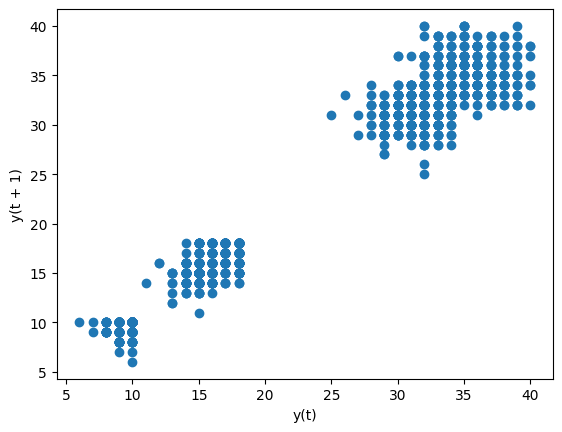

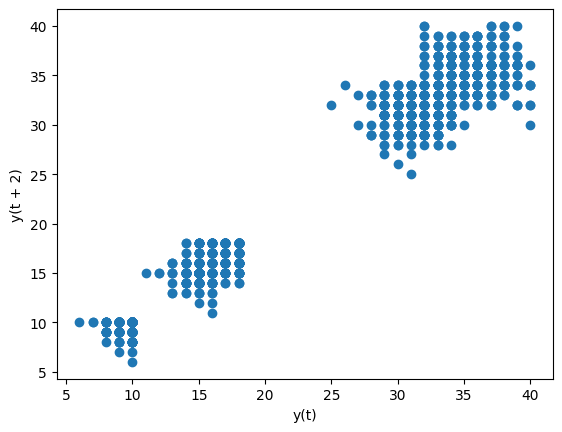

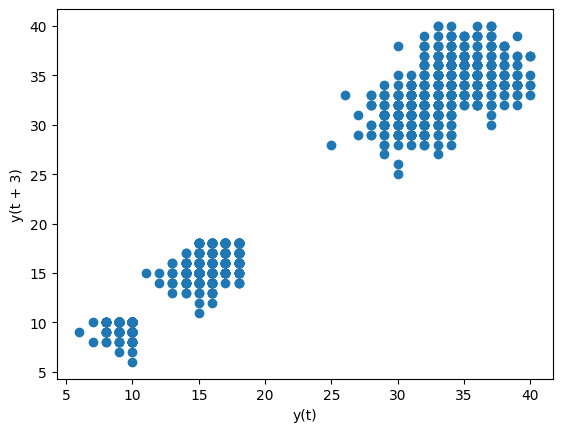

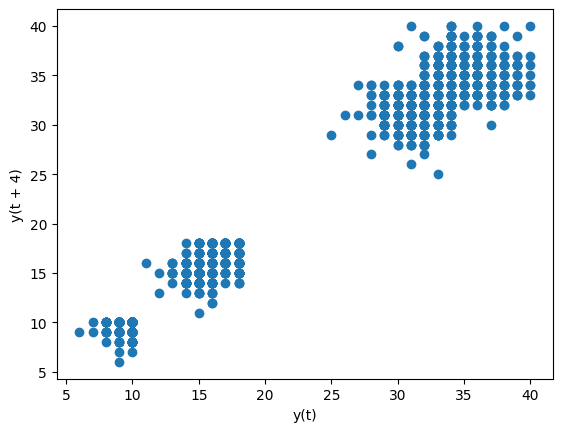

In [87]:
for lag in range(1,5):
  plt.figure()
  pd.plotting.lag_plot(df, lag=lag)


In [89]:
chars_list

['C', 'D', 'E', 'F', 'G']

In [92]:
df.describe()

,C,D,E,F,G
count,300.000000,300.000000,300.000000,300.000000,300.00000
mean,16.936667,9.513333,35.383333,14.873333,31.17000
std,1.062899,0.661777,2.068167,0.725057,1.59465
min,14.000000,6.000000,30.000000,11.000000,25.00000
25%,16.000000,9.000000,34.000000,15.000000,30.00000
50%,17.000000,10.000000,35.000000,15.000000,31.00000
75%,18.000000,10.000000,37.000000,15.000000,32.00000
max,18.000000,10.000000,40.000000,16.000000,34.00000


In [96]:
from numpy import mean
from numpy import std

# calculate summary statistics
data_mean, data_std = mean(df), std(df)
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off
print(f'data_mean=\n{data_mean}, data_std=\n{data_std}')
print(f'lower=\n{lower}, upper=\n{upper}')

data_mean=
[C    16.936667
D     9.513333
E    35.383333
F    14.873333
G    31.170000
dtype: float64], data_std=
C    1.061126
D    0.660673
E    2.064717
F    0.723848
G    1.591990
dtype: float64
lower=
C    14.814414
D     8.191987
E    31.253900
F    13.425638
G    27.986019
dtype: float64, upper=
C    19.058919
D    10.834679
E    39.512767
F    16.321029
G    34.353981
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [103]:
outliers_idx, ch, df.loc[outliers_idx, ch]

([94, 269],
 'G',
 94     27.0
 269    27.0
 Name: G, dtype: float64)

In [104]:
# identify outliers
for ch in chars_list:
  outliers = [x for x in df[ch] if x < lower[ch] or x > upper[ch]]
  outliers_idx = df.index[df[ch]==outliers[0]].tolist()
  #print(ch, outliers, '\n', outliers_idx, '\n')
  print(outliers_idx)


[50, 77, 161, 170, 265, 269]
[24, 63, 100, 104, 122, 133, 151, 154, 159, 161, 164, 169, 187, 202, 228, 252]
[11, 25, 135, 141, 166, 283, 287]
[13, 54, 56, 147, 152, 154, 155, 163, 176]
[94, 269]


# Conclusion: outlier is
269 by 'C, G' \
161 by 'C, D' \


In [ ]:
df.boxplot(column=['C', 'D', 'F'])


In [ ]:
df.boxplot(column=['E', 'G'])

In [ ]:
df.boxplot()

from sklearn.neighbors import LocalOutlierFactor
#Note that neighbors.LocalOutlierFactor does not support predict, decision_function
#and score_samples methods by default but only a fit_predict method, as this estimator
#was originally meant to be applied for outlier detection. The scores of abnormality
#of the training samples are accessible through the negative_outlier_factor_ attribute.

n_neighbors = 150
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
results = clf.fit_predict(df) #
print(np.where(results==-1))
#estimator.predict(X_test): Inliers are labeled 1, while outliers are labeled -1.
#clf.negative_outlier_factor_
#The decision_function method is also defined from the scoring function, in such
#a way that negative values are outliers and non-negative ones are inliers:
#estimator.decision_function(X_test)

#negative_outlier_factor_: The opposite LOF of the training samples. The higher, the more normal.
#Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.


In [116]:
#LocalOutlierFactor example
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = [[-1.1], [0.2], [11.1], [-111.3]]
clf = LocalOutlierFactor(n_neighbors=2)
results = clf.fit_predict(X)
print(f'results={results}')
print(f'negative_outlier_factor_={clf.negative_outlier_factor_}')
print(f'outlier index={np.where(results==-1)}')

results=[ 1  1  1 -1]
negative_outlier_factor_=[-0.97336066 -1.05627706 -0.97336066 -9.34173409]
outlier index=(array([3]),)


In [126]:
from sklearn.neighbors import LocalOutlierFactor
n_neighbors = 20
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
results = clf.fit_predict(df)
outlier_idx = np.where(results==-1)
print(f'outlier index={outlier_idx}')
print(f'outlier results={results[outlier_idx]}')
print(f'outlier negative_outlier_factor_={clf.negative_outlier_factor_[outlier_idx]}')
print(f'first 10 negative_outlier_factor_={clf.negative_outlier_factor_[:10]}')

outlier index=(array([ 45, 135, 137, 140, 143, 146, 148, 155, 164, 190, 262, 288]),)
outlier results=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
outlier negative_outlier_factor_=[-1.63759579 -1.50026475 -1.82081551 -1.93056717 -1.55666172 -1.63528849
 -1.60019316 -1.74239944 -1.61802005 -1.54305933 -1.92250104 -1.63992056]
first 10 negative_outlier_factor_=[-1.0334174  -0.94853776 -0.97339274 -1.04384366 -1.08397401 -0.97991079
 -1.06165438 -1.14582014 -1.00804242 -1.07669871]


In [ ]:
df.boxplot()


outliers as indicated by out of range of mean by 2*std:\
Conclusion: outlier with shared columns is:\
161 by 'C, D' \
269 by 'C, G' \

C [50, 77, 161, 170, 265, 269]\
D [24, 63, 100, 104, 122, 133, 151, 154, 159, 161, 164, 169, 187, 202, 228, 252]\
E [11, 25, 135, 141, 166, 283, 287]\
F [13, 54, 56, 147, 152, 154, 155, 163, 176]\
G [94, 269]\



In [149]:
from sklearn.neighbors import LocalOutlierFactor
n_neighbors = 2
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
#results = clf.fit_predict(df[['G']])
results = clf.fit_predict(df)

outlier_idx = np.where(results==-1)
print(f'outlier index={outlier_idx}')
print(f'outlier results={results[outlier_idx]}')
print(f'outlier negative_outlier_factor_={clf.negative_outlier_factor_[outlier_idx]}')
print(f'first 10 negative_outlier_factor_={clf.negative_outlier_factor_[:10]}')

outlier index=(array([  2,   9,  18,  21,  32,  41,  50,  52,  53,  60,  61,  63,  67,
        71,  83,  84,  89,  93,  98, 100, 105, 108, 110, 118, 119, 121,
       123, 125, 127, 135, 137, 139, 140, 158, 169, 175, 179, 180, 182,
       186, 189, 203, 205, 206, 211, 227, 234, 239, 240, 244, 250, 253,
       277, 280, 288, 294, 297, 299]),)
outlier results=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
outlier negative_outlier_factor_=[-5.00000000e+09 -5.00000000e+09 -1.00000000e+10 -1.73205081e+10
 -5.00000000e+09 -5.00000000e+09 -1.57313218e+00 -5.00000000e+09
 -1.58346434e+00 -1.57313218e+00 -1.00000000e+10 -6.03553391e+09
 -5.00000000e+09 -5.00000000e+09 -1.00000000e+10 -1.00000000e+10
 -5.00000000e+09 -5.00000000e+09 -7.07106781e+09 -1.41421356e+10
 -1.00000000e+10 -1.00000000e+10 -5.00000000e+09 -5.00000000e+09
 -5.00000000e+09 -5.00000000e+09 -5.0000

https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py

Outlier detection with Local Outlier Factor (LOF)


In [ ]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [ ]:
X_inliers.shape, np.random.randn(100, 2).shape, X_outliers.shape, n_outliers, X.shape

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

#Simple Anomaly Detection using Unsupervised KNN

Ref: https://www.kaggle.com/code/kimchanyoung/simple-anomaly-detection-using-unsupervised-knn

KNN is a supervised learning-based algorithm.
However, using KNN's distance calculation method can also be used as an unsupervised learning method.

In this work, we will use Scikit-Learn's NearestNeighbors, which we can use it for unsupervised learning

sklearn.neighbors.NearestNeighbors
class sklearn.neighbors.NearestNeighbors(*, n_neighbors=5, radius=1.0, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, n_jobs=None)
n_neighbors : int, default=5 (Number of neighbors to use by default for kneighbors queries.)
radius : float, default=1.0 (Range of parameter space to use by default for radius_neighbors queries.)
algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ (Algorithm used to compute the nearest neighbors)
metric : str or callable, default=’minkowski’ (the distance metric to use for the tree.)
p : int, default=2 (Parameter for the Minkowski metric from sklearn.metrics.pairwise.pairwise_distances. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.)





In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [151]:
df.columns

Index(['C', 'D', 'E', 'F', 'G'], dtype='object')

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.scatter(df["C"], df["D"], color='Red')
ax.set_xlabel('C', fontsize='11')
ax.set_ylabel('D', fontsize='11')
plt.title('C vs D frequency')
plt.grid()
plt.show()

In [155]:
# create model
n_neighbors = 10
nbrs = NearestNeighbors(n_neighbors = n_neighbors)
# fit model
nbrs.fit(df)


NearestNeighbors(n_neighbors=10)

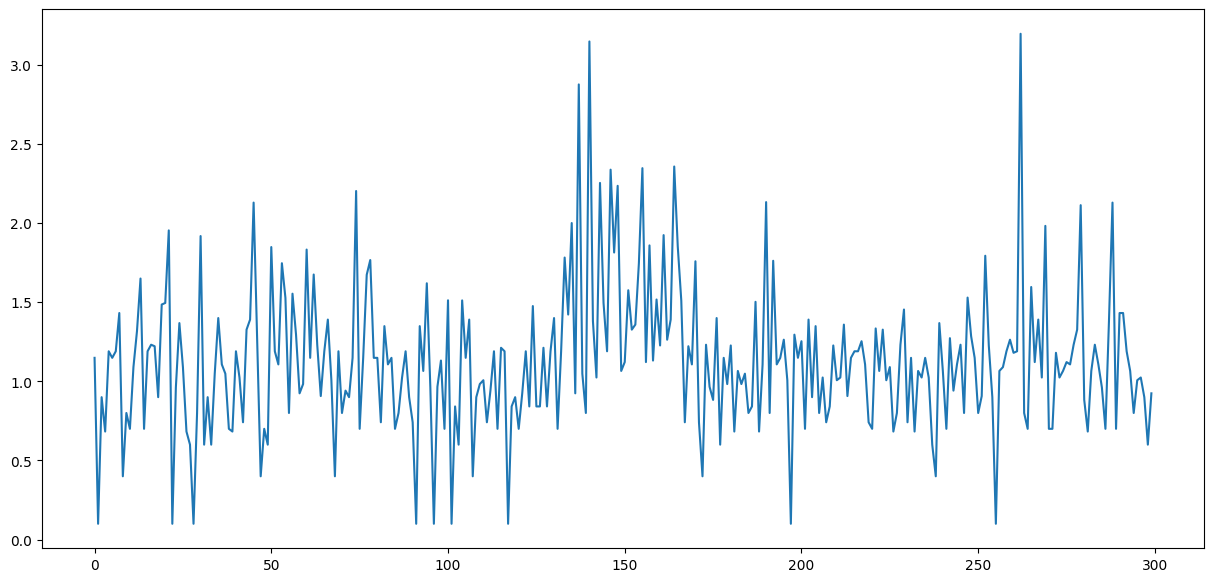

In [156]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [157]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0      1.148528
1      0.100000
2      0.900000
3      0.682843
4      1.189949
         ...   
295    1.007107
296    1.024264
297    0.900000
298    0.600000
299    0.924264
Length: 300, dtype: float64

In [158]:
distances

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,1.0,1.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.414214,1.414214
4,0.0,1.0,1.0,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,1.0,1.000000,1.000000,1.414214,1.414214,1.414214,1.414214,1.414214
296,0.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.414214,1.414214,1.414214
297,0.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
298,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
#Set thresholds with reference to statistics.

distances_mean.describe()


count    300.000000
mean       1.126441
std        0.458078
min        0.100000
25%        0.841421
50%        1.107107
75%        1.326722
max        3.196171
dtype: float64

In [167]:
np.linspace(0, 3, num=4)

array([0., 1., 2., 3.])

In [172]:
#Since 75th percentile is 8.35, we will set threshold into 9.0
#Since 75th percentile is 1.32, we will set threshold into 1.5
for th in np.linspace(1.9, 3, num=5):
  outlier_index = np.where(distances_mean > th)
  print(th, len(list(outlier_index[0])), outlier_index)


1.9 18 (array([ 21,  30,  45,  74, 135, 137, 140, 143, 146, 148, 155, 161, 164,
       190, 262, 269, 279, 288]),)
2.175 9 (array([ 74, 137, 140, 143, 146, 148, 155, 164, 262]),)
2.45 3 (array([137, 140, 262]),)
2.725 3 (array([137, 140, 262]),)
3.0 2 (array([140, 262]),)


In [173]:
outlier_values = df.iloc[outlier_index]
outlier_values

,C,D,E,F,G
140,16.0,6.0,32.0,15.0,33.0
262,15.0,9.0,36.0,15.0,25.0


In [200]:
outlier_values

,C,D,E,F,G
140,16.0,6.0,32.0,15.0,33.0
262,15.0,9.0,36.0,15.0,25.0


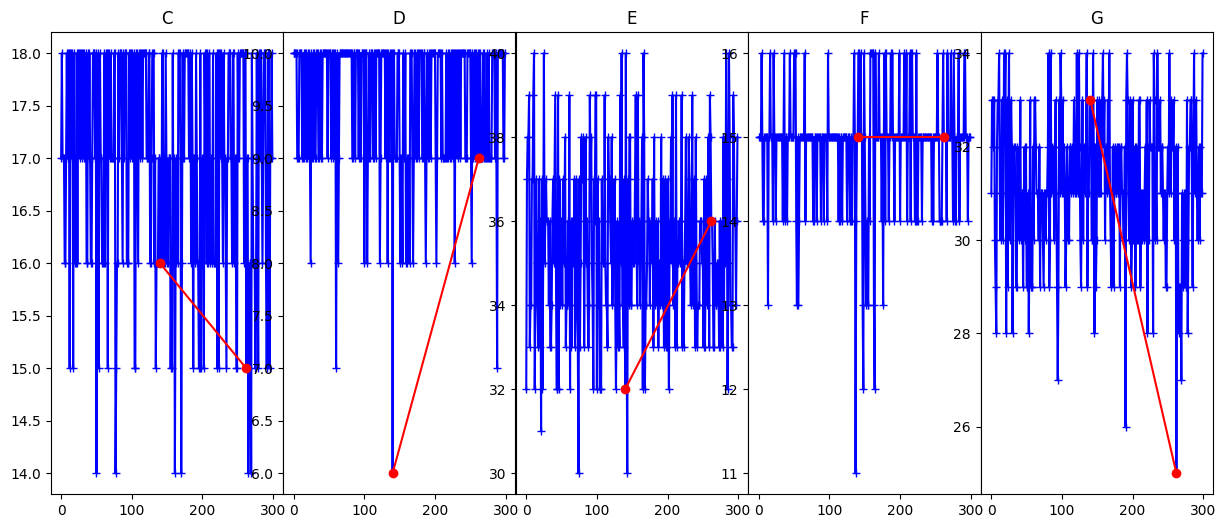

In [199]:
fig, axs = plt.subplots(1, len(chars_list), figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(0, len(chars_list)):
    axs[i].plot(df[chars_list[i]], color = "b", marker="+")
    axs[i].plot(outlier_values[chars_list[i]], color='r', marker="o") #s=80, facecolors='none', edgecolors='r'
    axs[i].set_title(chars_list[i])

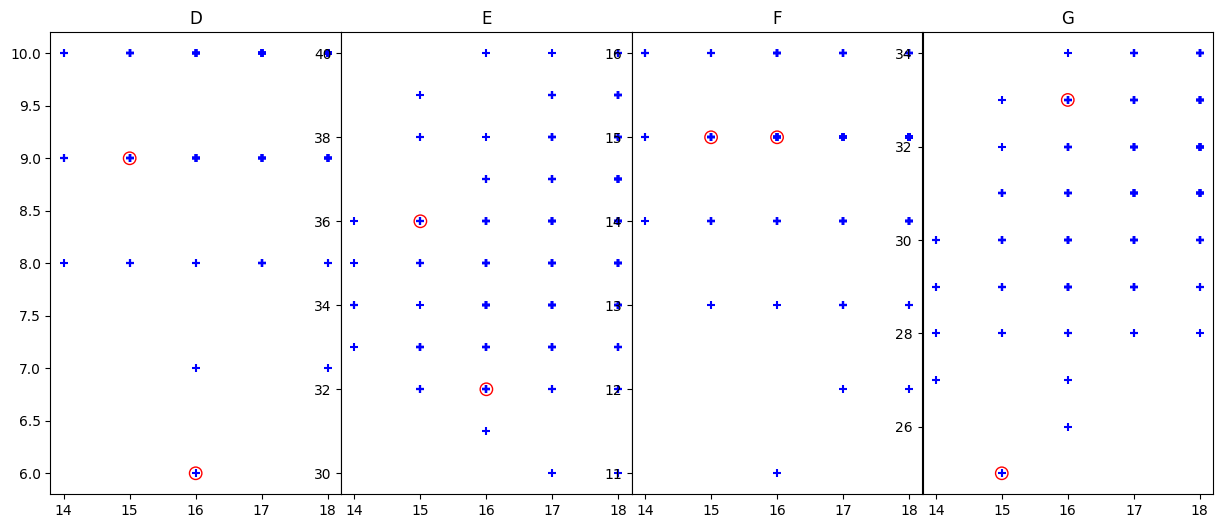

In [190]:
fig, axs = plt.subplots(1, len(chars_list)-1, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(1, len(chars_list)):
    axs[i-1].scatter(df["C"], df[chars_list[i]], color = "b", marker="+")
    axs[i-1].scatter(outlier_values["C"], outlier_values[chars_list[i]], marker="o", s=80, facecolors='none', edgecolors='r')
    axs[i-1].set_title(chars_list[i])

# Conclusion of outlier with single feature separately:
269 by 'C, G' \
161 by 'C, D' \

#Isolation Forest
One efficient way of performing outlier detection in high-dimensional datasets is to use random forests. The ensemble.IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.


#max_features int or float, default=1.0
The number of features to draw from X to train each base estimator.

If int, then draw max_features features.

If float, then draw max(1, int(max_features * n_features_in_)) features.

Note: using a float number less than 1.0 or integer less than number of features will enable feature subsampling and leads to a longer runtime.


In [223]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0) #len(chars_list))
clf.fit(df)

IsolationForest(max_samples=100, random_state=0)

In [231]:
clf.n_features_in_, clf.feature_names_in_

(5, array(['C', 'D', 'E', 'F', 'G'], dtype=object))

In [227]:
#Predict if a particular sample is an outlier or not.
results = clf.predict(df)
outlier_idx = np.where(results==-1)
print(f'num of outliers = {len(outlier_idx[0])}, outlier_idx={outlier_idx}')

num of outliers = 87, outlier_idx=(array([  4,   7,  11,  12,  13,  21,  24,  25,  30,  44,  45,  50,  53,
        54,  56,  60,  61,  62,  63,  66,  74,  77,  78,  82,  84,  92,
        98, 100, 104, 105, 122, 133, 135, 137, 140, 141, 143, 144, 146,
       147, 148, 151, 152, 154, 155, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 169, 170, 176, 180, 187, 190, 192, 198, 202, 209,
       212, 221, 223, 228, 235, 248, 252, 253, 260, 261, 262, 265, 266,
       267, 269, 275, 278, 279, 283, 287, 288, 291]),)


In [241]:
results.shape, len(outlier_idx[0])

((300,), 87)

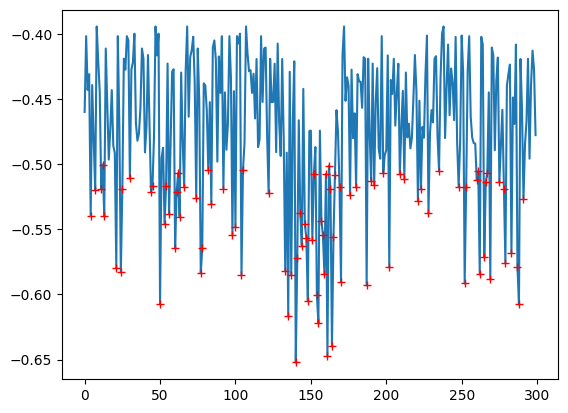

In [240]:
#Opposite of the anomaly score defined in the original paper.
results = clf.score_samples(df)
plt.plot(range(300), results)
plt.plot(outlier_idx[0], results[outlier_idx[0]], 'r+')

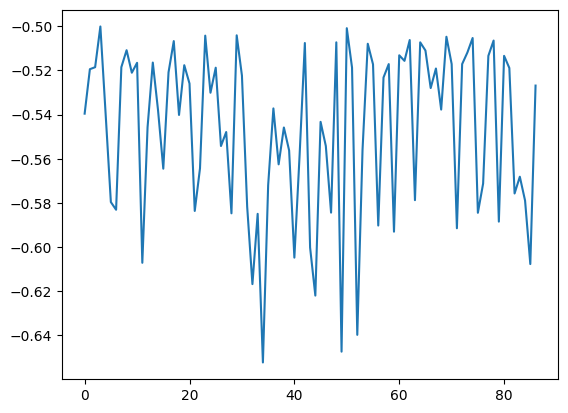

In [233]:
plt.plot(results[outlier_idx])


NameError: name 'handles' is not defined

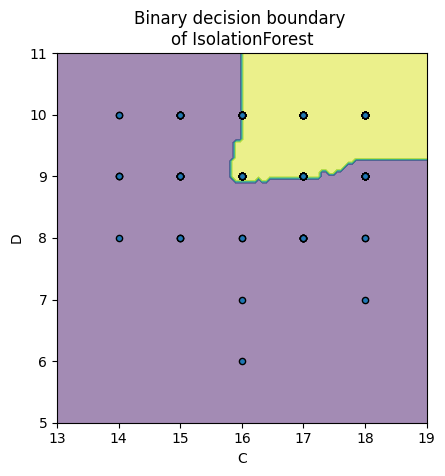

In [220]:
clf = IsolationForest(max_samples=100, random_state=0, max_features=2) #len(chars_list))
clf.fit(df[['C', 'D']])

import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    df[['C', 'D']],
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(df['C'], df['D'], s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()